In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyodbc
for driver in pyodbc.drivers():
    print(driver)
server = 'MOUNIKA\SQLEXPRESS'
database = 'AdventureWorks2022'

SQL Server
MySQL ODBC 8.3 ANSI Driver
MySQL ODBC 8.3 Unicode Driver
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server


In [4]:
con = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                      SERVER='+server+';\
                      DATABASE='+database+';\
                      Trusted_Connection=yes'
                    )

In [5]:
cursor = con.cursor()


In [6]:
df = pd.read_sql_query('select * from revenue_country_grp', con, index_col=None)

C:\Users\sarga\AppData\Local\Temp\ipykernel_26952\1960281415.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('select * from revenue_country_grp', con, index_col=None)


In [7]:
df.head()

,Country,Total_sales_Revenue,M_Date
0,AU,1532156,2011
1,CA,1874382,2011
2,DE,246861,2011
3,FR,213818,2011
4,GB,362889,2011


In [8]:
df['Country'] = df['Country'].replace({'AU': 'Australia', 'CA': 'Canada', 'DE': 'Germany', 'FR': 'France', 'GB': 'United Kingdom', 'US': 'United States'})

In [9]:
df.head()

,Country,Total_sales_Revenue,M_Date
0,Australia,1532156,2011
1,Canada,1874382,2011
2,Germany,246861,2011
3,France,213818,2011
4,United Kingdom,362889,2011


In [10]:
df.dtypes

Country                object
Total_sales_Revenue     int64
M_Date                  int64
dtype: object

In [11]:
df.describe()

,Total_sales_Revenue,M_Date
count,2.400000e+01,24.00000
mean,4.576933e+06,2012.50000
std,6.034514e+06,1.14208
min,2.138180e+05,2011.00000
25%,1.556178e+06,2011.75000
50%,2.257798e+06,2012.50000
75%,4.638262e+06,2013.25000
max,2.315715e+07,2014.00000


In [12]:
 #Descriptive Statistics
descriptive_stats = df.groupby('Country')['Total_sales_Revenue'].describe()

In [13]:
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,4.0,2663833.75,1.160032e+06,1532156.0,1976626.25,2446257.5,3133465.00,4230664.0
Canada,4.0,4088942.50,2.273791e+06,1874382.0,2261705.25,4125935.0,5953172.25,6229518.0
France,4.0,1812889.00,1.485060e+06,213818.0,1221319.25,1615616.0,2207185.75,3806506.0
Germany,4.0,1228852.00,1.051375e+06,246861.0,474268.50,1051663.0,1806246.50,2565221.0
United Kingdom,4.0,1917680.50,1.354561e+06,362889.0,1277114.25,1837205.0,2477771.25,3633423.0
United States,4.0,15749397.50,7.831475e+06,8411567.0,9287513.00,15714438.0,22176322.50,23157147.0


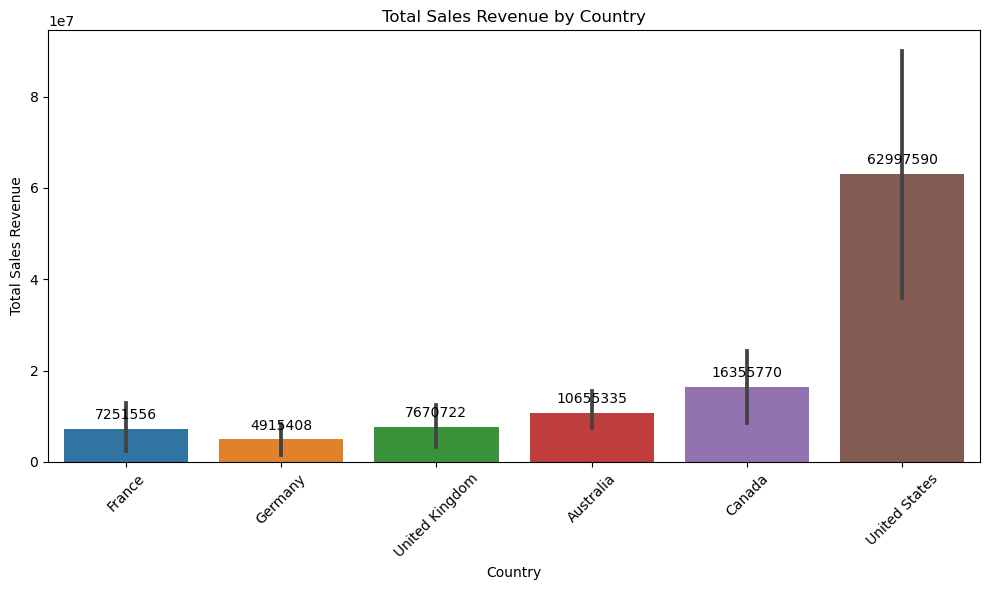

In [14]:
# sorting values by Total_sales_Revenue and Visualisation
df1= df.sort_values(by='Total_sales_Revenue')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Country', y='Total_sales_Revenue', data=df1, estimator=sum)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Country')
plt.tight_layout()

# Annotate each bar with its corresponding revenue value
for p in ax.patches:
    # Check if the height of the bar is not zero
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')

plt.show()

C:\Users\sarga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


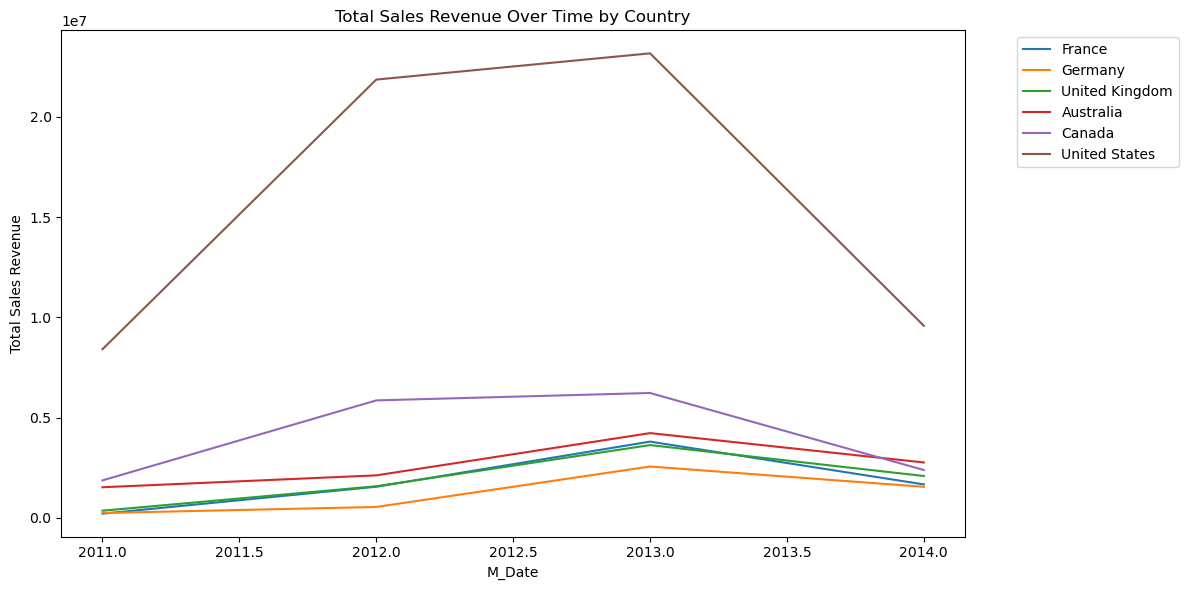

In [15]:
# Total Sales Revenue over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='M_Date', y='Total_sales_Revenue', hue='Country', data=df1)
plt.xlabel('M_Date')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue Over Time by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

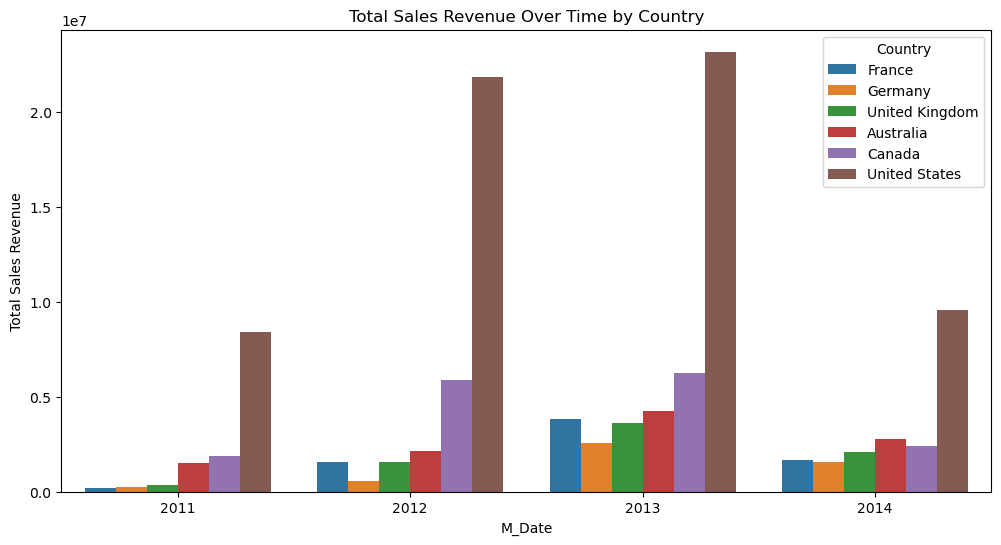

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='M_Date', y='Total_sales_Revenue', hue='Country', data=df1)
plt.xlabel('M_Date')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue Over Time by Country')
plt.show()

In [17]:
#Performing an ANOVA test allows us to assess whether there are significant differences in total revenue across different countries, 
#providing insights into the relationship between country and total revenue.
from scipy.stats import f_oneway

In [18]:
# Extract revenue data for each country
revenue_by_country = []
for country in df['Country'].unique():
    revenue_by_country.append(df[df['Country'] == country]['Total_sales_Revenue'])

# Perform ANOVA test
f_statistic, p_value = f_oneway(*revenue_by_country)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 10.169239136173529
P-value: 9.419869209710148e-05


In [19]:
# P value is less than 0.05, which indicates there are differences in total revenue across different countries which indicates there is no
#relation between different countries and Revenues.



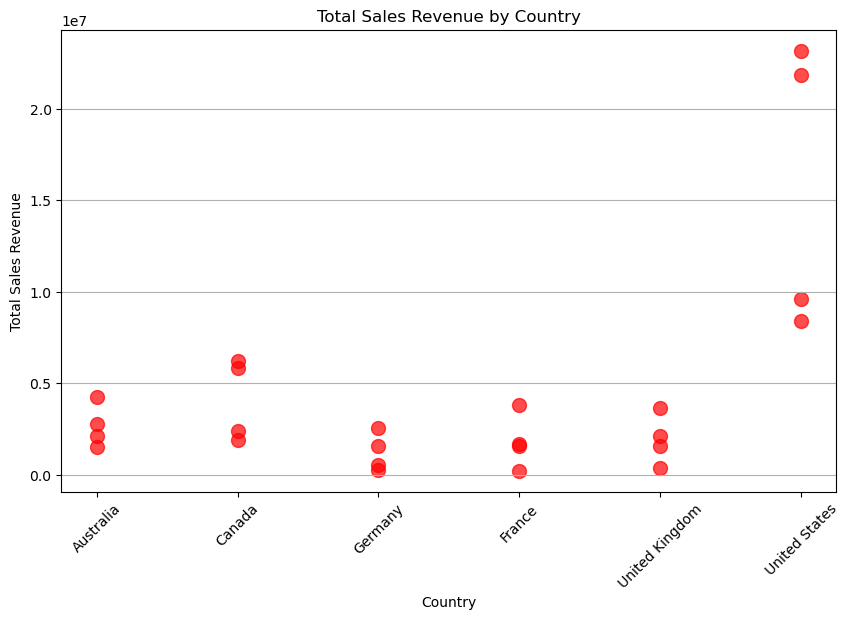

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Country'], df['Total_sales_Revenue'], color='red', s=100, alpha=0.7)
plt.title('Total Sales Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()